In [22]:
import numpy as np
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT
import time
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from collections import deque


In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
env = JoypadSpace(env, COMPLEX_MOVEMENT)

Vamos a ver los estados y las acciones que se pueden realizar

In [3]:
env.observation_space
# Tenemos imagenes RGB de 240x256 pixeles

Box(0, 255, (240, 256, 3), uint8)

In [4]:
env.action_space.n

12

<img src="combinaciones.png"/>

Las 12 acciones corresponden a la siguiente combinación de botones:

- ['NOOP']
- ['right']
- ['right', 'A']
- ['right', 'B']
- ['right', 'A', 'B']
- ['A']
- ['left']
- ['left', 'A']
- ['left', 'B']
- ['left', 'A', 'B']
- ['down']
- ['up']

Vemos los siguientes atributos

Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 1, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 1, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 1, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 1, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False
Estado: (240, 256, 3), Recompensa: 1, Done: False
Estado: (240, 256, 3), Recompensa: -1, Done: False
Estado: (240, 256, 3), Recompensa: 0, Done: False

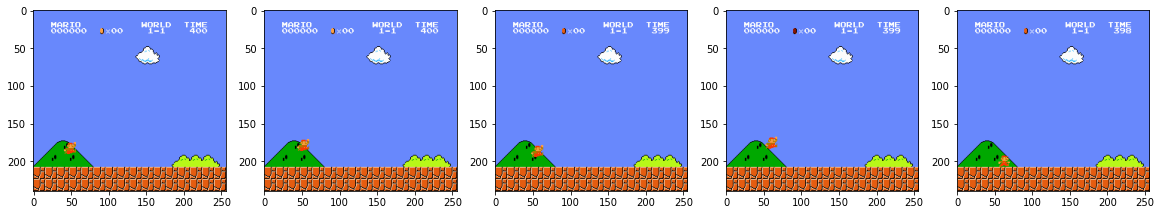

In [5]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 5))

env.reset()

done = False
for i in range(50):
    if i % 10:
        state, reward, done, _ = env.step(env.action_space.sample()) # Ejecuta una acción aleatoria
        print(f'Estado: {state.shape}, Recompensa: {reward}, Done: {done}')
        ax[i//10].imshow(state)

In [6]:
import random
episodes = 5

for i in range(episodes):
    env.reset()
    done = False
    score = 0
    while not done:
        action = random.choice(np.arange(0, 12))
        state, reward, done, _ = env.step(action)
        score += reward
    print(f'Episode: {i + 1} -> Score: {score}')


Episode: 1 -> Score: -25
Episode: 2 -> Score: -66
Episode: 3 -> Score: -113
Episode: 4 -> Score: -30
Episode: 5 -> Score: 83


In [13]:
#Deepmind

def deepmind_model(input_shape, output_size):

    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(32, 8, strides=4, activation="relu", input_shape=input_shape))
    model.add(keras.layers.Conv2D(32, 8, strides=4, activation="relu"))
    model.add(keras.layers.Conv2D(64, 4, strides=2, activation="relu"))
    model.add(keras.layers.Conv2D(64, 3, strides=1, activation="relu"))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation="relu"))
    model.add(keras.layers.Dense(output_size, activation="linear"))

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss= keras.losses.MeanSquaredError()
    )

    return model

In [9]:
def epsilon_greedy(epsilon):
    '''Exploración vs predicción'''
    random = np.random.uniform(0, 1, size=1)
    if (1 - epsilon) > random:
        action = model.predict(state)
    else:
        action = env.action_space.sample()
    
    epsilon *= 0.99

    return action, epsilon

In [16]:
env.observation_space.shape

(240, 256, 3)

In [17]:
state.shape

(240, 256, 3)

In [19]:
model_train = deepmind_model(input_shape=env.observation_space.shape, output_size=env.action_space.n)
model_target = deepmind_model(input_shape=env.observation_space.shape, output_size=env.action_space.n)

In [24]:
memory = deque(maxlen=64)